In [1]:
# do this if you use a custom virtual environment to specify the directory to look for installed packages
import sys
import os
## goes back to the project directory
os.chdir("..")
# switch to the name of your virtual environment
kernel_name = ".venv_mp"
sys.path.append("\\".join([os.getcwd(), kernel_name, "Lib\\site-packages"]))

In [2]:
from data_reader import read_data
from node import get_node_data
import pandas as pd
import numpy as np

In [3]:
data = read_data()
# nodes = {"pi"+str(i+2):i for i in range(4)}
nodes = ["pi2", "pi3", "pi4", "pi5"]

In [4]:
sampled_data = {}
m=200
for experiment in range(1,4):
    node_data, models, inliers = get_node_data(data, experiment, return_models=True)
    for i in range(4):
        node_data[i] = node_data[i].sample(230).reset_index(drop=True)
    sampled_data[experiment] = {"data" : node_data, "models" : models, "inliers" : inliers}

## Visualising Data

In [5]:
from visualising import visualise_experiments
# visualise_experiments(data)

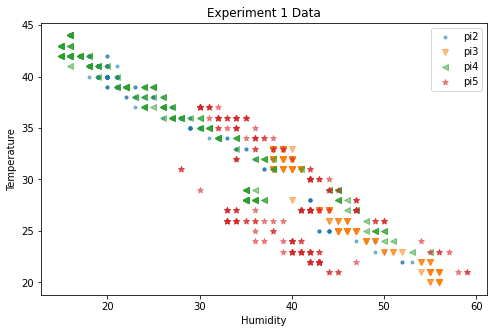

In [6]:
from visualising import visualise_experiment
visualise_experiment(sampled_data[1]["data"])

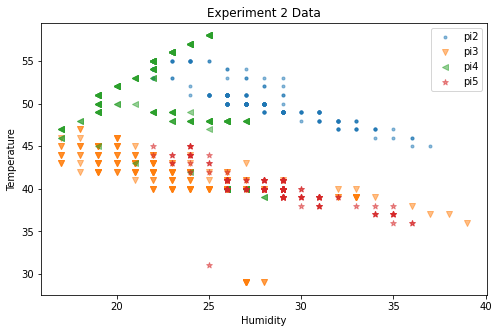

In [7]:
visualise_experiment(sampled_data[2]["data"])

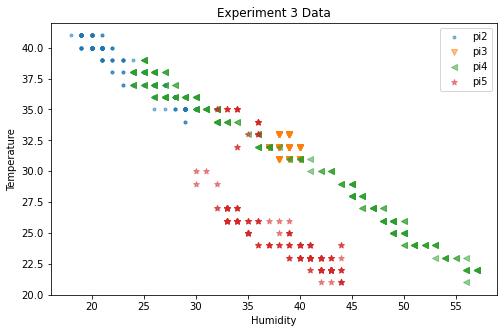

In [8]:
visualise_experiment(sampled_data[3]["data"])

## Similarity MMD

In [9]:
from maximum_mean_discrepancy import avg_similarity_disimilarity_MMD as ASDMMD
from prettytable import PrettyTable

def bandwidth_experiment(samples, similar_nodes, other_nodes, bandwidths, kernel):
    print(kernel.upper(), "\n")
    t = PrettyTable(['Bandwidth', 'Similarity MMD', 'Dissimilarity MMD'])
    for bandwidth in bandwidths:
        avg_sim_mmd, avg_dis_mmd, s, d = ASDMMD(samples, similar_nodes, other_nodes, kernel, bandwidth)
        t.add_row([bandwidth, avg_sim_mmd, avg_dis_mmd])
        print(s)
        print(d)
        print()
        
    print(t)
    print()

### Experiment 1

Nodes pi2 and pi4 are similar according to mmd and nodes pi3 and pi5 are similar to each other but not to the others

In [14]:
from maximum_mean_discrepancy import get_tensor_samples
tensor_samples = get_tensor_samples(sampled_data[1]["data"], sample_size=m)

In [15]:
similar_nodes = ["pi2","pi4"]
other_nodes = ["pi3","pi5"]
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(1, 10, 5), "rbf")

LINEAR 

+----------------+-------------------+
|     Nodes      |    Similar MMD    |
+----------------+-------------------+
| ('pi2', 'pi4') | 2.306915283203125 |
+----------------+-------------------+
+----------------+--------------------+
|     Nodes      |   Dissimilar MMD   |
+----------------+--------------------+
| ('pi3', 'pi2') | 37.09490966796875  |
| ('pi3', 'pi4') | 31.439483642578125 |
| ('pi5', 'pi2') | 27.356460571289062 |
| ('pi5', 'pi4') | 22.470504760742188 |
| ('pi3', 'pi5') | 3.7915802001953125 |
+----------------+--------------------+

+----------------+------------------+
|     Nodes      |   Similar MMD    |
+----------------+------------------+
| ('pi2', 'pi4') | 6.92083740234375 |
+----------------+------------------+
+----------------+--------------------+
|     Nodes      |   Dissimilar MMD   |
+----------------+--------------------+
| ('pi3', 'pi2') | 111.28485107421875 |
| ('pi3', 'pi4') |    94.318359375    |
| ('pi5', 'pi2') | 82.06939697265625  |
| ('p

similar_sets = ["pi3", "pi5"]
dissimilar_sets = ["pi2", "pi4"]
bandwidth_experiment(samples, similar_sets, dissimilar_sets, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(samples, similar_sets, dissimilar_sets, np.linspace(1, 10, 5), "rbf")

### Experiment 3

Nodes pi3, pi4, pi5 are dissimilar with pi2. Nodes pi3 and pi4 are similar to each other and similar to pi5.

In [17]:
tensor_samples = get_tensor_samples(sampled_data[3]["data"], sample_size=m)

In [18]:
similar_nodes = ["pi2", "pi4"]
other_nodes = ["pi3", "pi5"]
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(1,5 , 4), "rbf")

LINEAR 

+----------------+-------------------+
|     Nodes      |    Similar MMD    |
+----------------+-------------------+
| ('pi2', 'pi4') |  31.471923828125  |
| ('pi3', 'pi2') | 27.75909423828125 |
| ('pi3', 'pi4') | 2.716217041015625 |
| ('pi5', 'pi4') |      5.59375      |
| ('pi3', 'pi5') | 7.165496826171875 |
+----------------+-------------------+
+----------------+-------------------+
|     Nodes      |   Dissimilar MMD  |
+----------------+-------------------+
| ('pi5', 'pi2') | 40.67694091796875 |
+----------------+-------------------+

+----------------+-------------------+
|     Nodes      |    Similar MMD    |
+----------------+-------------------+
| ('pi2', 'pi4') | 94.41571044921875 |
| ('pi3', 'pi2') |  83.2772216796875 |
| ('pi3', 'pi4') |  8.14874267578125 |
| ('pi5', 'pi4') | 16.78131103515625 |
| ('pi3', 'pi5') |  21.496337890625  |
+----------------+-------------------+
+----------------+-------------------+
|     Nodes      |   Dissimilar MMD  |
+--------------

similar_sets = ["pi2", "pi3", "pi4"]
dissimilar_sets = ["pi5"]
bandwidth_experiment(samples, similar_sets, dissimilar_sets, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(samples, similar_sets, dissimilar_sets, np.linspace(1,5 , 4), "rbf")

### Experiment 2

In [19]:
tensor_samples = get_tensor_samples(sampled_data[2]["data"], sample_size=m)

In [20]:
similar_nodes = ["pi3", "pi5"]
other_nodes = ["pi2", "pi4"]
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(0.1, 0.7, 4), "linear")
bandwidth_experiment(tensor_samples, similar_nodes, other_nodes, np.linspace(5,100 , 5), "rbf")

LINEAR 

+----------------+--------------------+
|     Nodes      |    Similar MMD     |
+----------------+--------------------+
| ('pi3', 'pi5') | 4.8644256591796875 |
+----------------+--------------------+
+----------------+--------------------+
|     Nodes      |   Dissimilar MMD   |
+----------------+--------------------+
| ('pi2', 'pi3') | 13.138351440429688 |
| ('pi2', 'pi5') | 13.434478759765625 |
| ('pi4', 'pi3') | 13.798995971679688 |
| ('pi4', 'pi5') | 19.243255615234375 |
| ('pi2', 'pi4') |   5.884033203125   |
+----------------+--------------------+

+----------------+-------------------+
|     Nodes      |    Similar MMD    |
+----------------+-------------------+
| ('pi3', 'pi5') | 14.59307861328125 |
+----------------+-------------------+
+----------------+-------------------+
|     Nodes      |   Dissimilar MMD  |
+----------------+-------------------+
| ('pi2', 'pi3') |   39.4150390625   |
| ('pi2', 'pi5') | 40.30316162109375 |
| ('pi4', 'pi3') |  41.3970947265625 |
|

## Testing Hypothesis

In [38]:
from sklearn.preprocessing import StandardScaler
from visualising import visualise_train_test_data

def get_xy_data(data):
    x = data.humidity.values.astype(np.float32)
    y = data.temperature.values.astype(np.float32)
    return x, y

def get_model_data(node_data, standardised = False):
    model_data = {}
    
    if standardised:
        scaler = StandardScaler()
        scaler.fit(pd.concat(node_data)[["humidity", "temperature"]])
    
    for i in range(4):
        node = "pi"+str(i+2)
        if standardised:
            std_node = scaler.transform(node_data[i][["humidity", "temperature"]])
            model_data[node] = (std_node[:,0],std_node[:,1])
        else:
            model_data[node] = get_xy_data(node_data[i])
        
    return model_data

In [22]:
from modelling import fit_clf, score_clf
from prettytable import PrettyTable

def test_in_pairs(similar_pairs, model_data, models):
    t = PrettyTable(['Model Node', 'Test Node', 'Discrepancy'])
    for pair in similar_pairs:
        x = model_data[pair[0]]
        y = model_data[pair[1]]
        
        model_x = models[pair[0]]
        ex = fit_clf(model_x, x)
        exy = score_clf(model_x, y)

        model_y = models[pair[1]]
        ey = fit_clf(model_y, y)
        eyx = score_clf(model_y, x)       
        
        t.add_row([pair[1], pair[0], abs(ex-eyx)])  
        t.add_row([pair[0], pair[1], abs(ey-exy)])
    print(t)

In [23]:
from maximum_mean_discrepancy import get_tensor_samples, get_similar_pairs_mmd
from maximum_mean_discrepancy import avg_similarity_disimilarity_MMD as ASDMMD
from prettytable import PrettyTable
from node import get_similar_other_nodes_sets, get_similar_pairs_ocsvm, remove_outliers
from modelling import grid_search_models
from itertools import combinations as comb

def get_mmd_similar_pairs(experiment, kernel, kernel_bandwidth):
    node_data = sampled_data[experiment]["data"]
    
    tensor_samples = get_tensor_samples(node_data, sample_size=200)
    similar_nodes, other_nodes = get_similar_other_nodes_sets(experiment)
    asmmd = ASDMMD(tensor_samples, similar_nodes, other_nodes, kernel, kernel_bandwidth, return_tables = False)
    print(f"The average MMD between similar sets is {asmmd}")
    
    similar_pairs, similar_nodes = get_similar_pairs_mmd(node_data, asmmd, kernel, kernel_bandwidth)
    print(f"The following pairs of nodes were deemed similar {similar_pairs} using the MMD method.\n")
    
    return similar_pairs, similar_nodes

def get_ocsvm_similar_pairs(threshold, unidirectional = False):
    node_data = get_node_data(data, experiment, filtered = False)
    models = sampled_data[experiment]["models"]
    inliers =  sampled_data[experiment]["inliers"]
    similar_pairs, similar_nodes = get_similar_pairs_ocsvm(node_data, models, inliers, threshold, unidirectional)
    print(f"The following pairs of nodes were deemed similar {similar_pairs} using the OCSVM method.\n")
    
    return similar_pairs, similar_nodes

def select_model_data(node_data, similar_nodes, standardised):
    model_data = get_model_data(node_data, standardised)
    selected_model_data = {node : model_data[node] for node in similar_nodes}
    return selected_model_data

def get_data(experiment, method, similar_pairs_args, standardised):
    node_data = sampled_data[experiment]["data"]
    if method in ["mmd", "ocsvm"]:
        if method == "mmd":
            kernel, kernel_bandwidth = similar_pairs_args
            similar_pairs, similar_nodes = get_mmd_similar_pairs(experiment, kernel, kernel_bandwidth)
            node_data = sampled_data[experiment]
        elif method == "ocsvm":
            threshold, unidirectional = similar_pairs_args
            similar_pairs, similar_nodes = get_ocsvm_similar_pairs(threshold, unidirectional)
                                            
        model_data = select_model_data(node_data, similar_nodes, standardised)
        
    elif method in ["both", "verify", "trio"]:
        threshold, unidirectional = similar_pairs_args[1]
        ocsvm_similar_pairs, ocsvm_similar_nodes = get_ocsvm_similar_pairs(threshold, unidirectional)

        kernel, kernel_bandwidth = similar_pairs_args[0]
        mmd_similar_pairs, mmd_similar_nodes = get_mmd_similar_pairs(experiment, kernel, kernel_bandwidth)
        
        if method in ["both", "trio"]:
            similar_pairs = [mmd_similar_pairs, ocsvm_similar_pairs]
            similar_nodes = [mmd_similar_nodes, ocsvm_similar_nodes]
            
            mmd_model_data = select_model_data(node_data, mmd_similar_nodes, standardised)
            ocsvm_model_data = select_model_data(node_data, ocsvm_similar_nodes, standardised)
            
            model_data = [mmd_model_data, ocsvm_model_data]
        
        if method in  ["verify", "trio"]:
            str_mmd_similar_pairs = str([pair[::-1] for pair in mmd_similar_pairs]) + str(mmd_similar_pairs)
            verify_similar_pairs = [pair for pair in ocsvm_similar_pairs if str(pair) in str_mmd_similar_pairs]
            verify_similar_nodes = [node for node in ocsvm_similar_nodes if node in str(verify_similar_pairs)]
            
            verify_model_data = select_model_data(node_data, verify_similar_nodes, standardised)

            if method == "trio":
                similar_pairs.append(verify_similar_pairs)
                similar_nodes.append(verify_similar_nodes)
                model_data.append(verify_model_data)
            else:
                similar_pairs = verify_similar_pairs
                similar_nodes = verify_similar_nodes
                model_data = verify_model_data

    return model_data, similar_pairs, similar_nodes

def test_hypothesis(clf_name, model_data, similar_pairs, similar_nodes): 
    print("Optimising Models... \n")
    models = grid_search_models(clf_name, model_data, similar_nodes)
    test_in_pairs(similar_pairs, model_data, models)
    print()
    
def test_hypothesis_all_clfs(model_data, similar_pairs, similar_nodes):        
    test_hypothesis("svr", model_data, similar_pairs, similar_nodes)
    test_hypothesis("lsvr", model_data, similar_pairs, similar_nodes)
    test_hypothesis("lreg", model_data, similar_pairs, similar_nodes)

def test_hypothesis_all_methods_clfs(model_data, similar_pairs, similar_nodes):
    print("MMD Method \n")
    test_hypothesis_all_clfs(model_data[0], similar_pairs[0], similar_nodes[0])    
    print("OCSVM Method \n")
    test_hypothesis_all_clfs(model_data[1], similar_pairs[1], similar_nodes[1])
    if len(model_data[2]) != 0:
        print("MMD OCSVM Verify Method \n")
        test_hypothesis_all_clfs(model_data[2], similar_pairs[2], similar_nodes[2])

In [27]:
model_data, similar_pairs, similar_nodes = get_data(1, "trio", similar_pairs_args = [("linear", 0.5), (0.45, False)], 
                                                   standardised=False)
test_hypothesis_all_methods_clfs(model_data, similar_pairs, similar_nodes)

The following pairs of nodes were deemed similar [('pi2', 'pi4'), ('pi3', 'pi4')] using the OCSVM method.

The average MMD between similar sets is 11.6715087890625
The following pairs of nodes were deemed similar [('pi2', 'pi4')] using the MMD method.

MMD Method 

Optimising Models... 

+------+----------------+--------------------+-------------------------+--------------------+
| Node | Baseline Model |     Baseline R     |     Optimised Model     | Optimised Model R  |
+------+----------------+--------------------+-------------------------+--------------------+
| pi2  |     SVR()      | 0.979518330992064  | SVR(C=100, epsilon=0.5) | 0.989379602183008  |
| pi4  |     SVR()      | 0.9476589348967412 |  SVR(C=100, epsilon=1)  | 0.9640779648987416 |
+------+----------------+--------------------+-------------------------+--------------------+
+------------+-----------+---------------------+
| Model Node | Test Node |     Discrepancy     |
+------------+-----------+---------------------+


+------------+-----------+-----------------------+
| Model Node | Test Node |      Discrepancy      |
+------------+-----------+-----------------------+
|    pi4     |    pi2    | 0.0033892393014356426 |
|    pi2     |    pi4    | 0.0010156009778983233 |
+------------+-----------+-----------------------+

Optimising Models... 

+------+--------------------+--------------------+----------------------------------+--------------------+
| Node |   Baseline Model   |     Baseline R     |         Optimised Model          | Optimised Model R  |
+------+--------------------+--------------------+----------------------------------+--------------------+
| pi2  | LinearRegression() | 0.9835398310598202 |        LinearRegression()        | 0.9835398310598202 |
| pi4  | LinearRegression() | 0.9208679731895273 | LinearRegression(normalize=True) | 0.9208679778384044 |
+------+--------------------+--------------------+----------------------------------+--------------------+
+------------+-----------+--

In [39]:
model_data, similar_pairs, similar_nodes = get_data(1, "trio", similar_pairs_args = [("linear", 0.5), (0.45, False)], 
                                                   standardised=True)
test_hypothesis_all_methods_clfs(model_data, similar_pairs, similar_nodes)

The following pairs of nodes were deemed similar [('pi2', 'pi4'), ('pi3', 'pi4')] using the OCSVM method.

The average MMD between similar sets is 11.1732177734375
The following pairs of nodes were deemed similar [('pi2', 'pi4')] using the MMD method.

MMD Method 

Optimising Models... 

+------+----------------+--------------------+--------------------------+--------------------+
| Node | Baseline Model |     Baseline R     |     Optimised Model      | Optimised Model R  |
+------+----------------+--------------------+--------------------------+--------------------+
| pi2  |     SVR()      | 0.9878302623914238 | SVR(C=100, epsilon=0.01) | 0.9893243762927294 |
| pi4  |     SVR()      | 0.9567291271881763 | SVR(C=100, epsilon=0.2)  | 0.9674715725390532 |
+------+----------------+--------------------+--------------------------+--------------------+
+------------+-----------+---------------------+
| Model Node | Test Node |     Discrepancy     |
+------------+-----------+-----------------

In [28]:
model_data, similar_pairs, similar_nodes = get_data(2, "trio", similar_pairs_args = [("linear", 0.7), (0.45, False)], 
                                                   standardised=False)
test_hypothesis_all_methods_clfs(model_data, similar_pairs, similar_nodes)

The following pairs of nodes were deemed similar [('pi2', 'pi4'), ('pi3', 'pi4')] using the OCSVM method.

The average MMD between similar sets is 34.7684326171875
The following pairs of nodes were deemed similar [('pi3', 'pi5')] using the MMD method.

MMD Method 

Optimising Models... 

+------+----------------+--------------------+-------------------------+--------------------+
| Node | Baseline Model |     Baseline R     |     Optimised Model     | Optimised Model R  |
+------+----------------+--------------------+-------------------------+--------------------+
| pi3  |     SVR()      | 0.3811014791466254 |  SVR(C=1, epsilon=0.5)  | 0.4029375991672216 |
| pi5  |     SVR()      | 0.6624443518084087 | SVR(C=100, epsilon=0.2) | 0.6705147526539665 |
+------+----------------+--------------------+-------------------------+--------------------+
+------------+-----------+---------------------+
| Model Node | Test Node |     Discrepancy     |
+------------+-----------+---------------------+


In [40]:
model_data, similar_pairs, similar_nodes = get_data(2, "trio", similar_pairs_args = [("linear", 0.7), (0.45, False)], 
                                                   standardised=True)
test_hypothesis_all_methods_clfs(model_data, similar_pairs, similar_nodes)

The following pairs of nodes were deemed similar [('pi2', 'pi4'), ('pi3', 'pi4')] using the OCSVM method.

The average MMD between similar sets is 35.026611328125
The following pairs of nodes were deemed similar [('pi3', 'pi5')] using the MMD method.

MMD Method 

Optimising Models... 

+------+----------------+-------------------+-------------------------+--------------------+
| Node | Baseline Model |     Baseline R    |     Optimised Model     | Optimised Model R  |
+------+----------------+-------------------+-------------------------+--------------------+
| pi3  |     SVR()      | 0.503858844746723 | SVR(C=0.1, epsilon=0.2) | 0.4337138466197503 |
| pi5  |     SVR()      | 0.652049025434405 | SVR(C=10, epsilon=0.01) | 0.6618291110804161 |
+------+----------------+-------------------+-------------------------+--------------------+
+------------+-----------+--------------------+
| Model Node | Test Node |    Discrepancy     |
+------------+-----------+--------------------+
|    pi5  

In [32]:
model_data, similar_pairs, similar_nodes = get_data(3, "trio", similar_pairs_args = [("linear", 0.5), (0.45, False)], 
                                                   standardised=False)
test_hypothesis_all_methods_clfs(model_data, similar_pairs, similar_nodes)

The following pairs of nodes were deemed similar [('pi2', 'pi4'), ('pi3', 'pi4')] using the OCSVM method.

The average MMD between similar sets is 24.57452392578125
The following pairs of nodes were deemed similar [('pi3', 'pi4')] using the MMD method.

MMD Method 

Optimising Models... 

+------+----------------+--------------------+--------------------------+---------------------+
| Node | Baseline Model |     Baseline R     |     Optimised Model      |  Optimised Model R  |
+------+----------------+--------------------+--------------------------+---------------------+
| pi3  |     SVR()      | 0.0770690042964639 | SVR(C=0.1, epsilon=0.2)  | 0.12051726863570589 |
| pi4  |     SVR()      | 0.9887995345905477 | SVR(C=100, epsilon=0.01) |  0.9901820331403585 |
+------+----------------+--------------------+--------------------------+---------------------+
+------------+-----------+--------------------+
| Model Node | Test Node |    Discrepancy     |
+------------+-----------+------------

+------------+-----------+--------------------+
| Model Node | Test Node |    Discrepancy     |
+------------+-----------+--------------------+
|    pi4     |    pi3    | 2.106100791236486  |
|    pi3     |    pi4    | 0.5724739430476724 |
+------------+-----------+--------------------+

Optimising Models... 

+------+--------------------+---------------------+----------------------------------+----------------------+
| Node |   Baseline Model   |      Baseline R     |         Optimised Model          |  Optimised Model R   |
+------+--------------------+---------------------+----------------------------------+----------------------+
| pi4  | LinearRegression() |  0.9867399674611098 | LinearRegression(normalize=True) |  0.9867399697665156  |
| pi3  | LinearRegression() | 0.02989916265257564 | LinearRegression(normalize=True) | 0.029898601569873673 |
+------+--------------------+---------------------+----------------------------------+----------------------+
+------------+-----------+--

In [41]:
model_data, similar_pairs, similar_nodes = get_data(3, "trio", similar_pairs_args = [("linear", 0.5), (0.45, False)], 
                                                   standardised=True)
test_hypothesis_all_methods_clfs(model_data, similar_pairs, similar_nodes)

The following pairs of nodes were deemed similar [('pi2', 'pi4'), ('pi3', 'pi4')] using the OCSVM method.

The average MMD between similar sets is 23.65399169921875
The following pairs of nodes were deemed similar [('pi3', 'pi4')] using the MMD method.

MMD Method 

Optimising Models... 

+------+----------------+---------------------+-------------------------+---------------------+
| Node | Baseline Model |      Baseline R     |     Optimised Model     |  Optimised Model R  |
+------+----------------+---------------------+-------------------------+---------------------+
| pi3  |     SVR()      | 0.08258791646327879 |        SVR(C=0.1)       | 0.08257271802949162 |
| pi4  |     SVR()      |  0.9891197959484355 | SVR(C=10, epsilon=0.01) |  0.9902422984092918 |
+------+----------------+---------------------+-------------------------+---------------------+
+------------+-----------+--------------------+
| Model Node | Test Node |    Discrepancy     |
+------------+-----------+------------